# Homework 2

This homework focuses on **resampling** and **noise**.

This homework will explore linear regression and resampling techniques by analysing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data Statistics
2. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [1]:
# git clone "https://gitlab.com/wgms/glathida.git"
# in folder

### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [2]:
import pandas as pd
import geopandas as geopd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import netCDF4 as nc
import wget
import plotly.express as px

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [3]:
# solution
t_path = "glacier.csv"
glacier = pd.read_csv("glacier.csv")
glacier.head()
# dataframe with 21 columns, with different glaciers with location, date samples, thickness, various parameters

,id,survey_id,name,external_db,external_id,latitude,longitude,date,max_date,area,...,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles,interpolation_method,flag,remarks
0,1,1,Isfallsglaciären,WGI,SE4B000E0006,67.91500,18.56800,1979-03-01,1979-03-31,1.3,...,72.0,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Rabots glaciär,WGI,SE4B000E1016,67.91000,18.49600,1979-03-01,1979-03-31,4.1,...,84.0,NaN,175.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
2,3,1,Storglaciären,WGI,SE4B000E0005,67.90000,18.57000,1979-03-01,1979-03-31,3.1,...,99.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,South Cascade Glacier,WGI,US2M00264006,48.35698,-121.05735,1975-01-01,1975-12-31,2.0,...,99.0,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,Athabasca Glacier,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [4]:
glacier['mean_thickness'].isna().sum() # 515 NaNs
glacier['area'].isna().sum() # 28 NaNs
glacier['mean_slope'].isna().sum() # 586 NaNs
glacier_clean = glacier.dropna(subset = ['mean_thickness', 'area', 'mean_slope'])

print(glacier_clean)
glacier_clean['mean_thickness'].isna().sum() # checking for NaNs

       id  survey_id                 name external_db     external_id  \
32     33          9       Easton Glacier         FOG            1367   
33     34         10  Lemon Creek Glacier         FOG            3334   
34     35         11         Praviy Aktru         WGI    SU5A15106127   
35     36         11          Maliy Aktru         WGI    SU5A15106126   
36     37         11          Leviy Aktru         WGI    SU5A15106128   
..    ...        ...                  ...         ...             ...   
618  2111        187          Blekumbreen       GLIMS  G016068E78246N   
626  2119        193    Tuyuksu (central)       GLIMS  G077080E43049N   
630  2123        195       Aldegondabreen         RGI  RGI50-07.01079   
744  2240        209            Ariebreen         RGI  RGI60-07.00209   
832  2328        229    Austre Lovenbreen         RGI  RGI60-07.00496   

      latitude   longitude        date    max_date    area  ...  \
32   48.750000 -121.830000  1992-01-01  1992-12-31   2.9

0

## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

### Option 1: Tif and matplotlib

You can use the ``elevation`` data from the DEM seen in class. Download the DEM file (https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1)

In [5]:
wget.download('https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1')

  0% [                                                  ]    925696 / 175047868

  5% [..                                                ]   9633792 / 175047868

 12% [......                                            ]  22708224 / 175047868

 21% [..........                                        ]  36896768 / 175047868

 28% [..............                                    ]  50470912 / 175047868

 36% [..................                                ]  63168512 / 175047868

 41% [....................                              ]  73449472 / 175047868

 50% [.........................                         ]  88023040 / 175047868

 58% [.............................                     ] 102227968 / 175047868

 66% [.................................                 ] 116178944 / 175047868

 74% [.....................................             ] 130850816 / 175047868

 82% [.........................................         ] 145039360 / 175047868

 89% [............................................      ] 157515776 / 175047868

 97% [................................................  ] 170590208 / 175047868

100% [..................................................] 175047868 / 175047868

'HYP_50M_SR (1).tif'

In [6]:
elevation = rasterio.open('HYP_50M_SR.tif') # make elevation data from .tif file
elevation.shape # check shape

(5400, 10800)


___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [7]:
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top) # calculate bounds of elevation
print(bounds)

(-179.99999999999997, 179.99999999996405, -89.99999999998201, 90.0)


We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [8]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = np.dstack((red, green, blue))

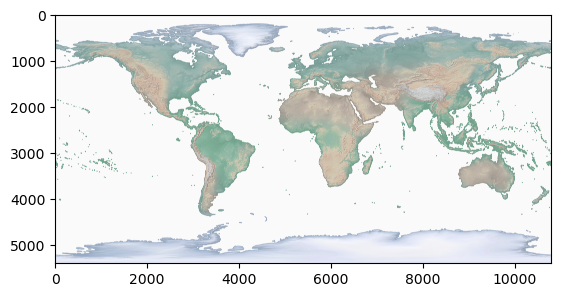

In [9]:
plt.imshow(pix) # need to add colors 

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [10]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe

In [11]:
# solution

## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with  of the features (example: km). ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

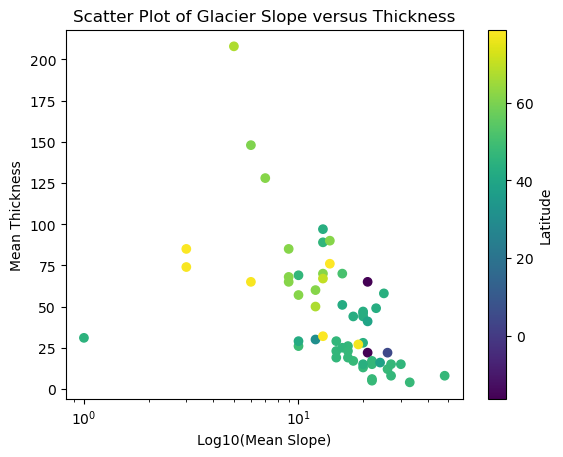

In [12]:
# Figure 1: Mean slope vs mean thickness
plt.scatter('mean_slope', 'mean_thickness', data = glacier_clean, c = "latitude", cmap = "viridis") 
plt.xscale('log') 
plt.xlabel("Log10(Mean Slope)")
plt.ylabel("Mean Thickness")
plt.title("Scatter Plot of Glacier Slope versus Thickness")
cbar = plt.colorbar()
cbar.set_label('Latitude')

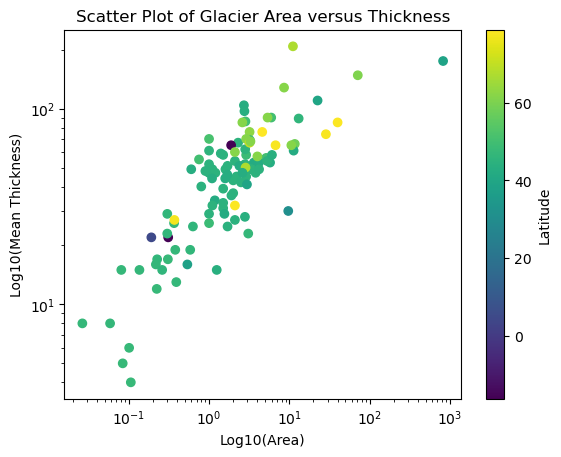

In [13]:
# Figure 2: area vs mean thickness
plt.scatter('area', 'mean_thickness', data = glacier_clean, c = "latitude", cmap = "viridis")
plt.xscale('log') 
plt.yscale('log')
plt.xlabel("Log10(Area)")
plt.ylabel("Log10(Mean Thickness)")
plt.title("Scatter Plot of Glacier Area versus Thickness")
cbar = plt.colorbar()
cbar.set_label('Latitude')

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

In [14]:
np.seterr(divide = 'ignore') # turn off warnings for NaN introduction
glacier_clean['mean_slope_log'] = np.log10(glacier_clean['mean_slope']) # introduced NaNs
glacier_clean['mean_thickness_log'] = np.log10(glacier_clean['mean_thickness']) # introduced NaNs
glacier_clean['area_log'] = np.log10(glacier_clean['area']) # introduced NaNs

glacier_clean_log = glacier_clean.dropna(subset = ['mean_thickness_log', 'area_log', 'mean_slope_log'])
# drop newly introduced NaNs

fig = px.scatter_3d(glacier_clean_log, x = 'mean_slope_log', y = 'mean_thickness_log', z = 'area_log',
             title = "3D Scatter Plot of Mean Slope, Mean Thickness, and Area") # 3d scatter plot

fig.show(renderer = "browser") # load in browser

/var/folders/c4/s0jjrrjd3y58m4gnv0f_88hc0000gn/T/ipykernel_86952/3352141593.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c4/s0jjrrjd3y58m4gnv0f_88hc0000gn/T/ipykernel_86952/3352141593.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c4/s0jjrrjd3y58m4gnv0f_88hc0000gn/T/ipykernel_86952/3352141593.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

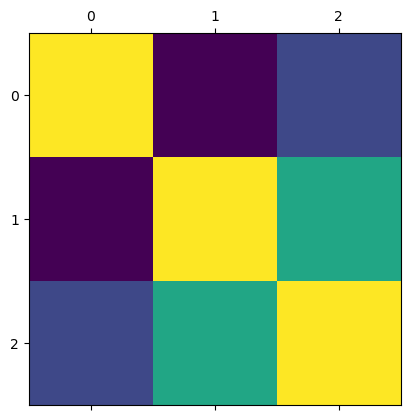

In [15]:
glacier_clean_corr = pd.DataFrame(glacier_clean_log, 
                                  columns = ['mean_slope', 'mean_thickness', 'area']) # small sample set for corr calc

glacier_clean_corr = glacier_clean_corr.corr() # save correlation of glacier data

plt.matshow(glacier_clean_corr) # generate heatmap

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/). You can visualize the data by plotting data features against each other and explore visually data correlations.

In [16]:
import seaborn as sns # load in seaborn

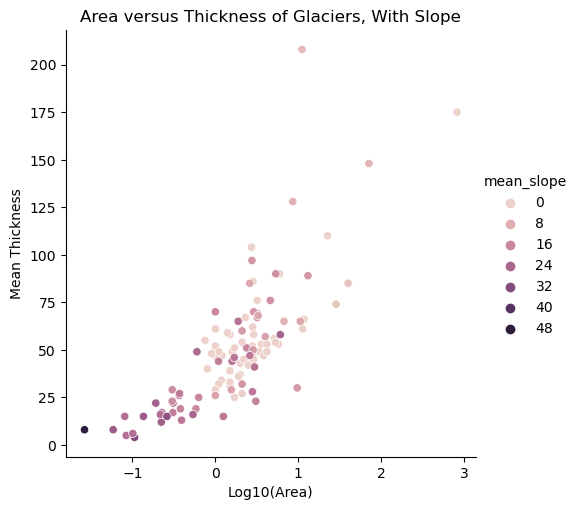

In [17]:
sns.relplot(data = glacier_clean_log,
           x = "area_log", 
           y = "mean_thickness",
           hue = "mean_slope").set(title = "Area versus Thickness of Glaciers, With Slope",
                                  xlabel = "Log10(Area)",
                                  ylabel = "Mean Thickness")

Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

##### Basic Correlations Answer
The mean slope of the glacier is negatively correlated to the thickness and area, whereas the thickness is positively correlated with area. This makes sense intuitively, as the thicker the glacier the larger the area most likely. However, if it is thicker the slope is most likely smaller. If the area is larger, the slope change over that space will be smaller.

## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [19]:
# check for NaNs
glacier_clean['mean_thickness_log'].isna().sum() # 0 NaNs
glacier_clean['area_log'].isna().sum() # 0 NaNs
glacier_clean['mean_slope_log'].isna().sum() # 0 NaNs

# format into X,Y
X = glacier_clean[['area_log']]
y = glacier_clean['mean_thickness_log']

# this is how I have learned it outside of this class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

model = LinearRegression() # Linear Regression Model

model.fit(X_train, y_train) # fitting to training data

y_pred = model.predict(X_test)

Make a plot of the data and the linear regression your performed

Text(0, 0.5, 'Mean Thickness')

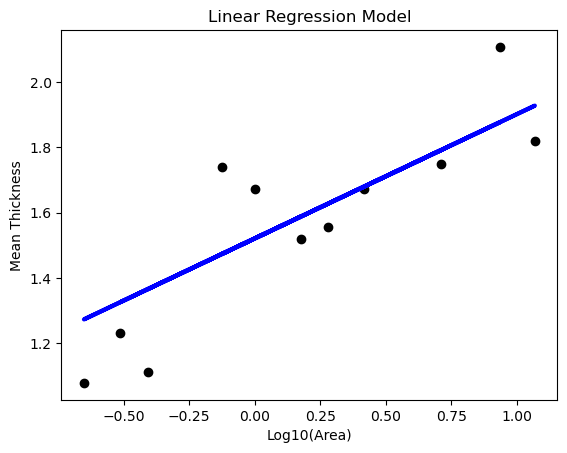

In [20]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model')
plt.xlabel('Log10(Area)')
plt.ylabel('Mean Thickness')

**Briefly comment on the quality of your fit and a linear regression (1 point)**

The fit seems decent, there are outliers where area is very low and very high, but overall not too bad. 

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

Text(0, 0.5, 'Predicted Mean Thickness (log)')

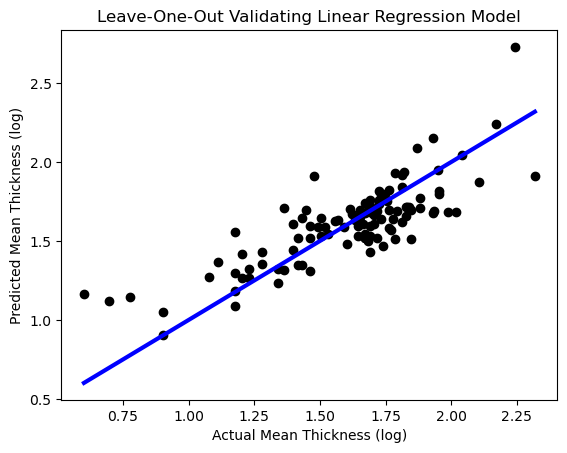

In [24]:
from sklearn.model_selection import LeaveOneOut

X = glacier_clean[['area_log']]
y = glacier_clean['mean_thickness_log']

# need to reshape array
X = X.values.reshape(-1, 1)

# linear regression model
model = LinearRegression()

# leave one out cross validation
loo = LeaveOneOut()

# empty lists to put findings in
pred = []
actual = []

# leave one out cross validation loop
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the linear regression model
    model.fit(X_train, y_train)

    # predict thickness based on area
    y_pred = model.predict(X_test)

    # put these in empty lists
    pred.append(y_pred[0])
    actual.append(y_test.values[0])

# plot using matplotlib
plt.scatter(actual, pred, color='black')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='blue', linewidth=3)
plt.title('Leave-One-Out Validating Linear Regression Model')
plt.xlabel('Actual Mean Thickness (log)')
plt.ylabel('Predicted Mean Thickness (log)')

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

Text(0, 0.5, 'Log 10 Frequency')

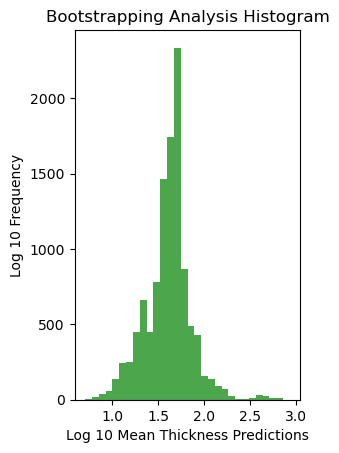

In [26]:
from sklearn.utils import resample

# split X and y
X = glacier_clean[['area_log']]
y = glacier_clean['mean_thickness_log']

# reshape X
X = X.values.reshape(-1, 1)

# linear regression model
model = LinearRegression()

# number of bootstrap samples
k = 100

# empty lists
bootstrap_pred = []
bootstrap_actual = []

# bootstrap
for i in range(k):
    # resample
    X_bootstrap, y_bootstrap = resample(X, y, random_state=np.random.randint(1000))

    # fiit linear regression to resample
    model.fit(X_bootstrap, y_bootstrap)

    # predictions
    y_pred = model.predict(X)

    # store results in empty lists
    bootstrap_pred.append(y_pred)
    bootstrap_actual.append(y.values)

# stack
bootstrap_pred = np.vstack(bootstrap_pred)

# calculate mean
mean_bootstrap_pred = np.mean(bootstrap_pred, axis=0)

plt.subplot(1, 2, 2)
plt.hist(bootstrap_pred.flatten(), bins=30, color='green', alpha=0.7)
plt.title('Bootstrapping Analysis Histogram')
plt.xlabel('Log 10 Mean Thickness Predictions')
plt.ylabel('Log 10 Frequency')

### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

In [31]:
# split X and y
X = glacier_clean[['area_log']]
y = glacier_clean['mean_thickness_log']

# reshape X
X = X.values.reshape(-1, 1)

# linear regression model
model = LinearRegression()

# number of bootstrap samples
k = 100

# empty lists
bootstrap_pred = []
bootstrap_actual = []

# bootstrap
for i in range(k):
    # resample
    X_bootstrap, y_bootstrap = resample(X, y, random_state=np.random.randint(1000))

    # fiit linear regression to resample
    model.fit(X_bootstrap, y_bootstrap)

    # predictions
    area_pred = np.log10(10)  # 
    thickness_pred = model.predict([[area_pred]])[0]

    # store results in empty lists
    bootstrap_pred.append(y_pred)
    bootstrap_actual.append(y.values)

# stack
bootstrap_pred.append(thickness_pred)
bootstrap_pred = np.array(bootstrap_pred) # convert to array

# Calculate mean and standard deviation of predicted ice thickness
mean_thickness = np.mean(bootstrap_pred)
std_thickness = np.std(bootstrap_pred)

print(mean_thickness)
print(std_thickness)

[1.6743123  1.9064109  1.76986974 1.67083357 1.79389604 1.44928297
 1.52469191 1.71075198 1.78840926 1.90091696 1.73554343 1.66365
 2.6143455  2.01522    1.69069209 1.69069209 1.70077963 1.49715139
 1.61248655 1.66847333 1.52748851 1.62834554 1.57535692 1.77464691
 1.63574203 1.61248655 1.56461814 1.51301038 1.56461814 1.58544446
 1.65614225 1.49715139 1.49715139 1.49715139 1.56461814 1.62060492
 1.51301038 1.58544446 1.66847333 1.71928685 1.6743123  1.46002176
 1.73594008 1.64961618 1.62060492 1.55313817 1.60395168 1.47962009
 1.56461814 1.66965763 1.49715139 1.87521829 1.49715139 1.07829501
 1.30065609 1.08500501 1.2474641  1.12371184 1.11567195 1.92495514
 1.30211309 1.22169003 1.60255337 0.89241243 1.24946663 1.16483679
 1.29764808 1.33015098 1.40722802 1.34073819 1.02474862 1.33588002
 1.29775842 1.24338525 1.42018453 1.69211592 1.27332682 1.77652003
 1.6743123  1.85519056 1.62060492 1.69069209 1.89765133 2.20713506
 1.66607914 2.11079035 2.05507817 1.5743137  1.49715139 1.6842242

/var/folders/c4/s0jjrrjd3y58m4gnv0f_88hc0000gn/T/ipykernel_86952/34591463.py:36: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Mean Predicted Ice Thickness: 1.6114 (log scale)
Standard Deviation of Predicted Ice Thickness: 0.2525 (log scale)